# load data & library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 생략된 column들을 모두 출력해주는 코드
# pd.set_option("display.max_columns", None)

In [3]:
train = pd.read_csv("house/train.csv", index_col="Id")
print(train.shape)
train.head(3)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test = pd.read_csv("house/test.csv", index_col="Id")
print(test.shape)
test.head(3)

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
# label 값 조회
set(train.columns) - set(test.columns)

{'SalePrice'}

In [6]:
# 제출 파일
sub = pd.read_csv("house/sample_submission.csv", index_col="Id")
print(sub.shape)
sub.head()

(1459, 1)


,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977


# 데이터 탐색

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
# 결측치가 있는지
# 이상치가 있는지
# 표준편차가 있는지
# 단순 기술통계 값을 확인하는 것이 아닌 특이점이 없는지 확인
# 수치범위의 개수가 작다면 범주형 데이터에 가까움 -> nunique로 추가 확인 필요
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


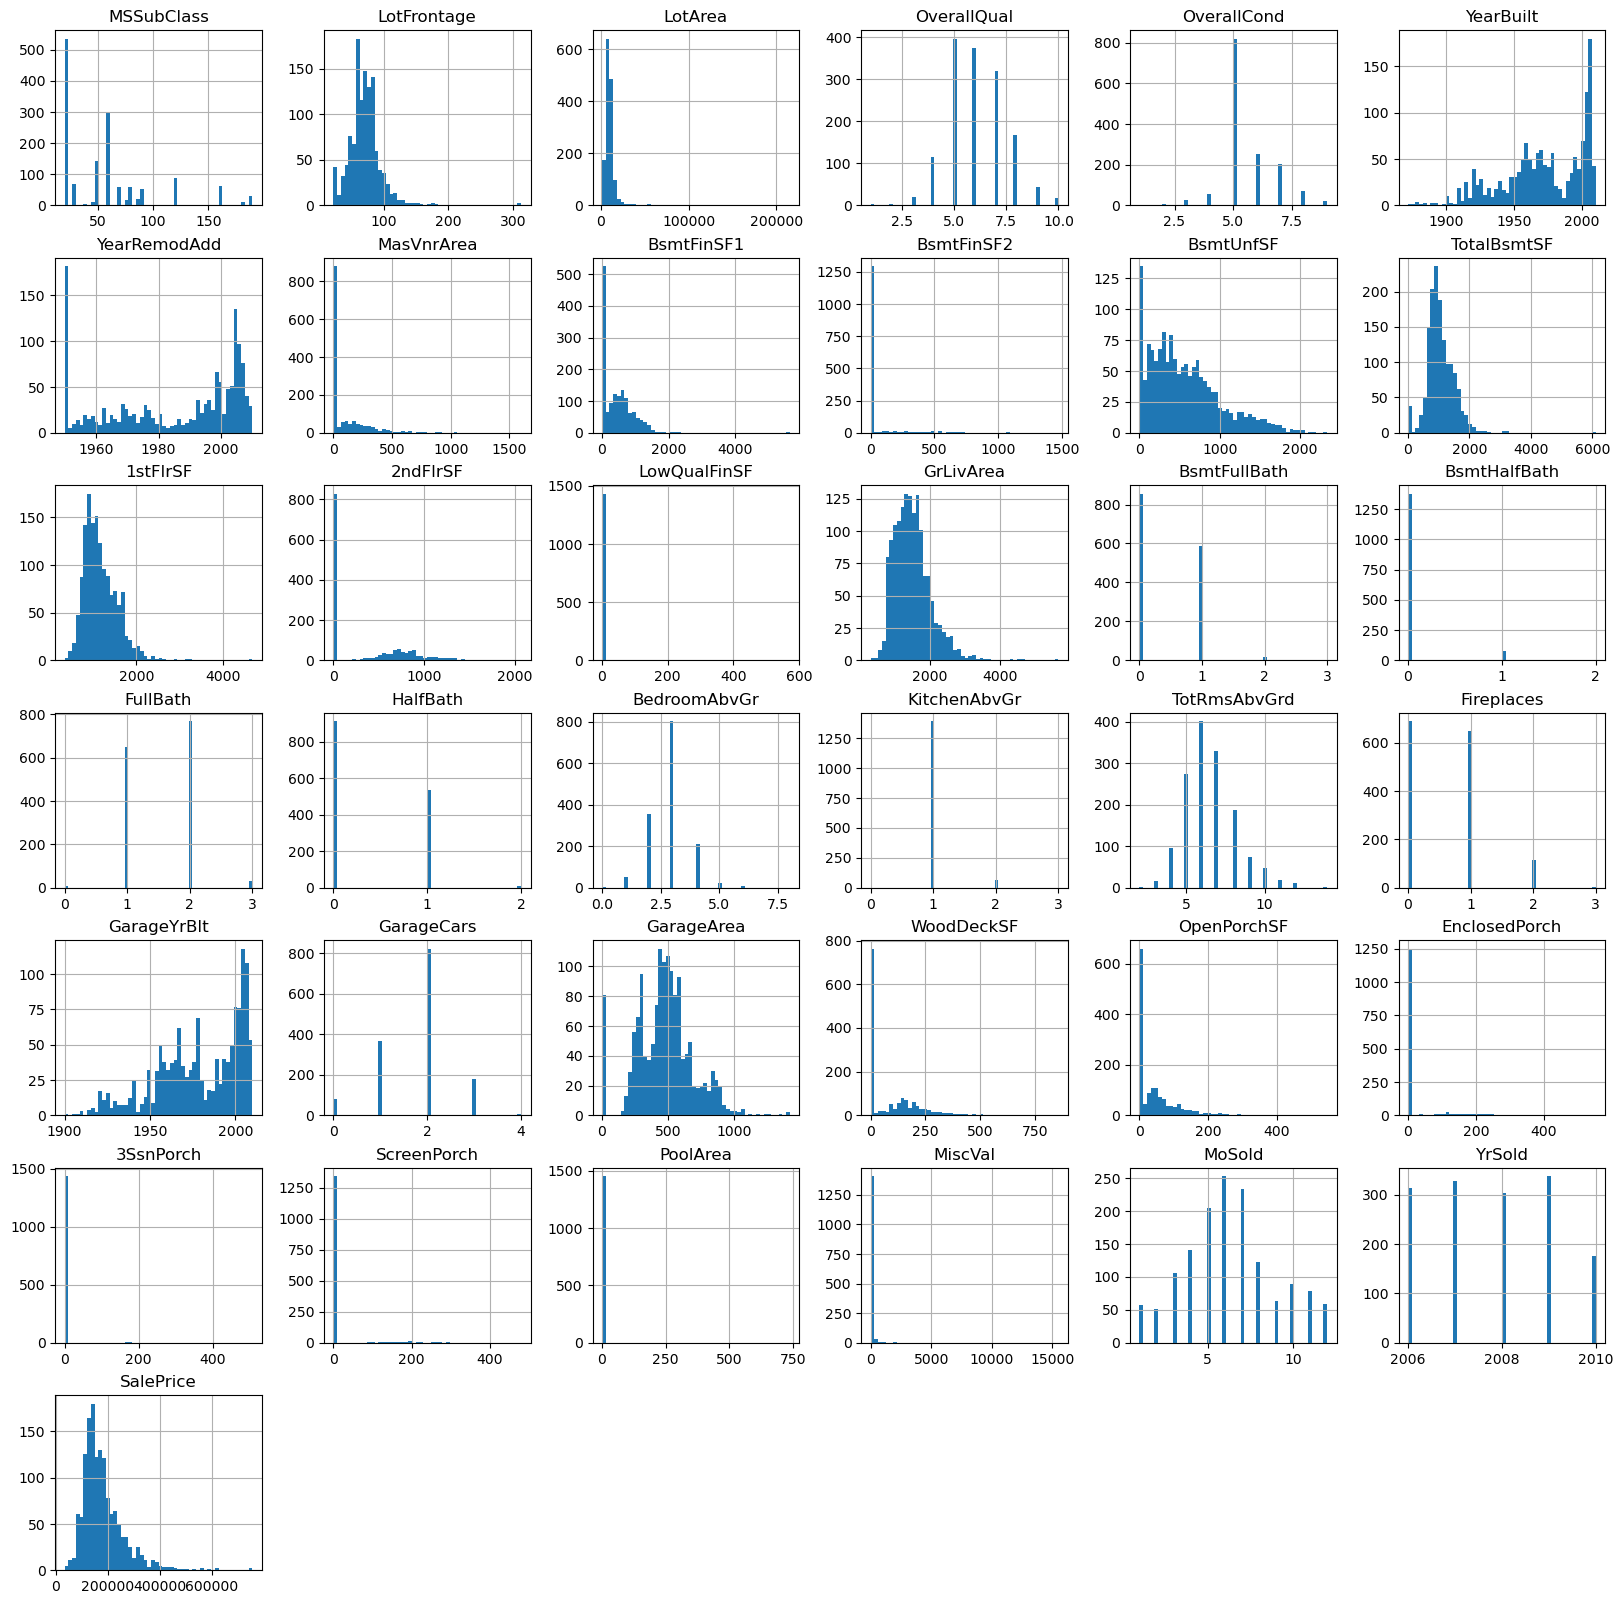

In [9]:
# 수치 데이터의 분포, 왜도, 첨도 확인 
# 막대가 떨어져 있다면 수치 데이터가 아니라 범주형 데이터가 아닌지 확인
# 학습에 도움이 될만한 피처 엔지니어링 기법이 무엇일지 고민
train.hist(figsize=(20, 20), bins=50);

# 결측치

In [10]:
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [11]:
test.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
dtype: int64

In [12]:
train_null = train.isnull().sum()
train_sum = train_null[train_null > 0].sort_values(ascending=False)
train_null_mean = train.isnull().mean() * 100

pd.concat([train_null, train_null_mean], axis=1).loc[train_sum.index]

,0,1
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [13]:
test_null = test.isnull().sum()
test_sum = test_null[test_null > 0].sort_values(ascending=False)
test_null_mean = test.isnull().mean() * 100

pd.concat([test_null, test_null_mean], axis=1).loc[test_sum.index]

,0,1
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127


# 이상치

In [14]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

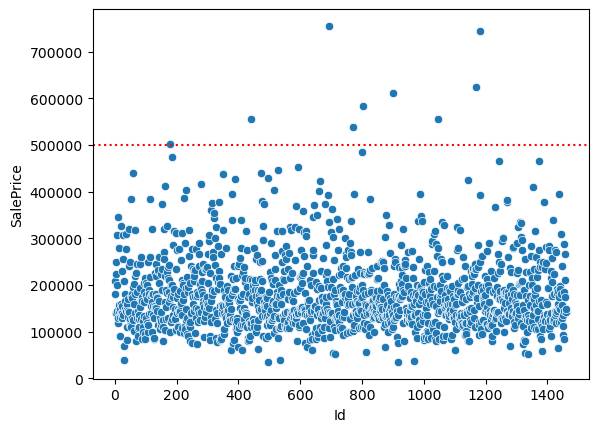

In [15]:
# 이상치를 평균이나 중앙값 등으로 대체하면 왜곡이 될 수 있으니 주의
sns.scatterplot(data=train, x=train.index, y='SalePrice')
plt.axhline(500000, c="r", ls=":")

# 희소값

In [16]:
# feature마다 범주의 개수
train.select_dtypes(include='object').nunique().nlargest(10)

Neighborhood    25
Exterior2nd     16
Exterior1st     15
Condition1       9
SaleType         9
Condition2       8
HouseStyle       8
RoofMatl         8
Functional       7
RoofStyle        6
dtype: int64

In [17]:
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

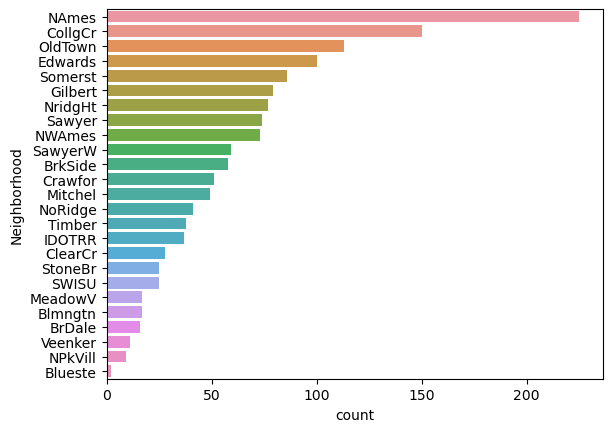

In [18]:
sns.countplot(data=train, y=train["Neighborhood"], order=train["Neighborhood"].value_counts().index)

# 변수 스케일링

<AxesSubplot:>

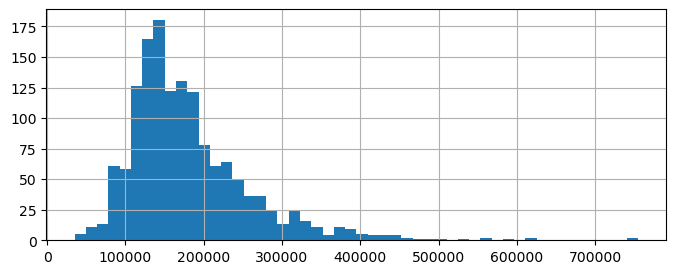

In [19]:
train["SalePrice"].hist(bins=50, figsize=(8, 3))

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [21]:
ss = StandardScaler()
ss

StandardScaler()

In [22]:
# fit에는 matrix 형태로 넣어줘야 함 == 대괄호 두 개
# 반환값도 matrix기 때문에 파생변수로 만들고 싶다면 대괄호 두 개 사용
train[["SalePrice_ss"]] = ss.fit(train[["SalePrice"]]).transform(train[["SalePrice"]])
train[["SalePrice", "SalePrice_ss"]].head()

,SalePrice,SalePrice_ss
Id,,
1,208500,0.347273
2,181500,0.007288
3,223500,0.536154
4,140000,-0.515281
5,250000,0.869843


In [23]:
mm = MinMaxScaler()
train[["SalePrice_mm"]] = mm.fit(train[["SalePrice"]]).transform(train[["SalePrice"]])
train[["SalePrice", "SalePrice_mm"]].head()

,SalePrice,SalePrice_mm
Id,,
1,208500,0.241078
2,181500,0.203583
3,223500,0.261908
4,140000,0.145952
5,250000,0.298709


In [24]:
rs = RobustScaler()
train[["SalePrice_rs"]] = rs.fit(train[["SalePrice"]]).transform(train[["SalePrice"]])
train[["SalePrice", "SalePrice_rs"]].head()

,SalePrice,SalePrice_rs
Id,,
1,208500,0.541506
2,181500,0.220173
3,223500,0.720024
4,140000,-0.273728
5,250000,1.035406


In [25]:
rs.inverse_transform(train[["SalePrice_rs"]])

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [26]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].head()

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
Id,,,,
1,208500,0.347273,0.241078,0.541506
2,181500,0.007288,0.203583,0.220173
3,223500,0.536154,0.261908,0.720024
4,140000,-0.515281,0.145952,-0.273728
5,250000,0.869843,0.298709,1.035406


# 스케일링 시각화

In [27]:
# pd.options.display.float_format = "{:, .2f}".format
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].describe().round(2)

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
count,1460.0,1460.00,1460.00,1460.00
mean,180921.2,0.00,0.20,0.21
std,79442.5,1.00,0.11,0.95
min,34900.0,-1.84,0.00,-1.52
25%,129975.0,-0.64,0.13,-0.39
50%,163000.0,-0.23,0.18,0.00
75%,214000.0,0.42,0.25,0.61
max,755000.0,7.23,1.00,7.05


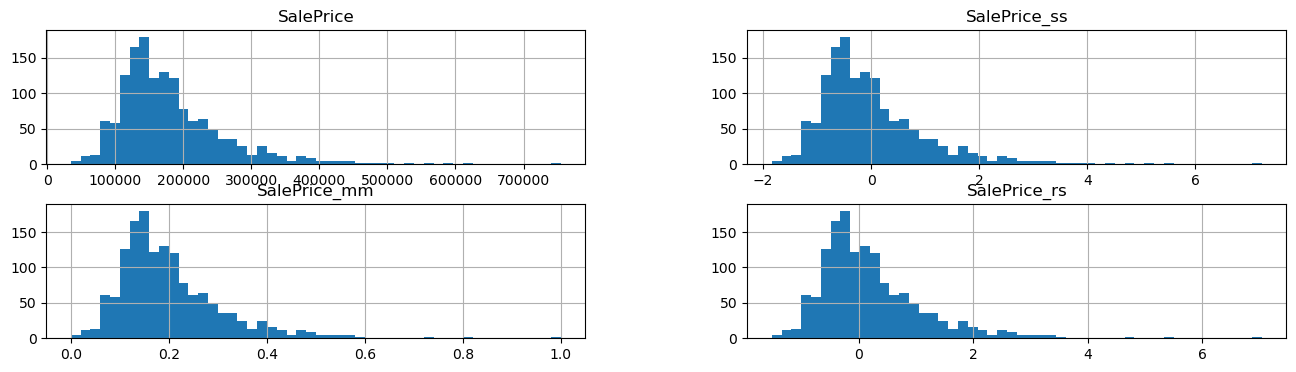

In [28]:
# x값의 범위만 달라질 뿐 분포는 그대로인 모습
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].hist(bins=50, figsize=(16, 4));

# Log Transformation

In [29]:
train["SalePrice_log1p"] = np.log1p(train["SalePrice"])
train["SalePrice_log1p"].head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice_log1p, dtype: float64

In [30]:
train[["SalePrice_log1p_ss"]] = ss.fit_transform(train[["SalePrice_log1p"]])

In [31]:
# 에러
# 1을 더해도 음수인 값이 있기 때문에 나오는 에러
train["SalePrice_ss_log1p"] = np.log1p(train["SalePrice_ss"])

/Users/jahyeon_gu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


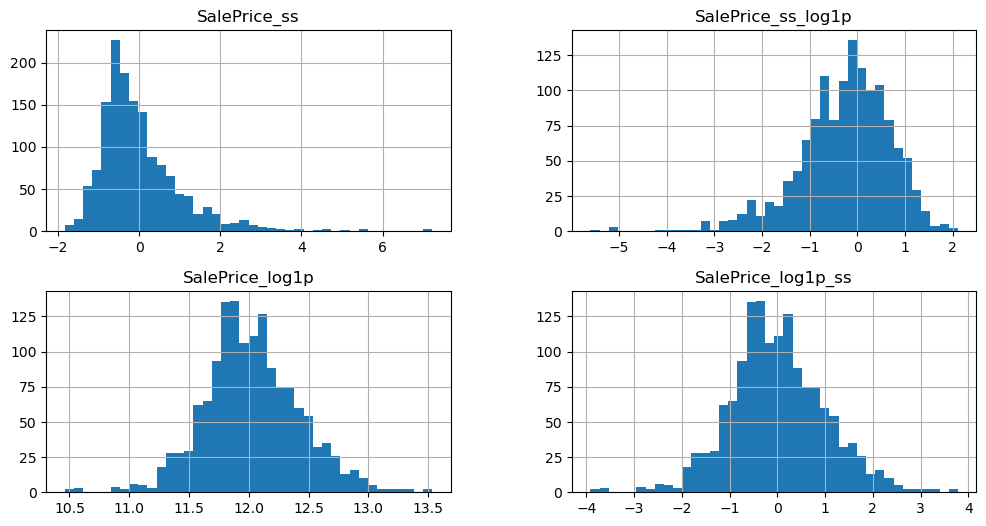

In [32]:
# log를 먼저 씌워야 정규분포가 모양이 됨을 알 수 있음
train[["SalePrice_ss", "SalePrice_ss_log1p", "SalePrice_log1p", "SalePrice_log1p_ss"]].hist(bins=40, figsize=(12, 6));

In [33]:
# SalePrice_ss_log1p의 개수가 다르다 : 1을 더해도 음수인 값은 결측치(NaN) 처리
train[["SalePrice_ss", "SalePrice_ss_log1p", "SalePrice_log1p", "SalePrice_log1p_ss"]].describe().round(2)

,SalePrice_ss,SalePrice_ss_log1p,SalePrice_log1p,SalePrice_log1p_ss
count,1460.00,1336.00,1460.00,1460.00
mean,0.00,-0.27,12.02,-0.00
std,1.00,0.97,0.40,1.00
min,-1.84,-5.60,10.46,-3.92
25%,-0.64,-0.79,11.78,-0.62
50%,-0.23,-0.14,12.00,-0.06
75%,0.42,0.41,12.27,0.63
max,7.23,2.11,13.53,3.78


# 이산화

In [34]:
train["SalePrice_cut"] = pd.cut(train["SalePrice"], bins=4, labels=[1, 2, 3, 4])
train["SalePrice_qcut"]= pd.qcut(train["SalePrice"], q=4, labels=[1, 2, 3, 4])

In [35]:
train[["SalePrice_cut", "SalePrice_qcut"]].head()

,SalePrice_cut,SalePrice_qcut
Id,,
1,1,3
2,1,3
3,2,4
4,1,2
5,2,4


In [36]:
train["SalePrice_cut"].value_counts()

1    1100
2     330
3      25
4       5
Name: SalePrice_cut, dtype: int64

In [37]:
train["SalePrice_qcut"].value_counts()

2    367
3    366
1    365
4    362
Name: SalePrice_qcut, dtype: int64

<AxesSubplot:>

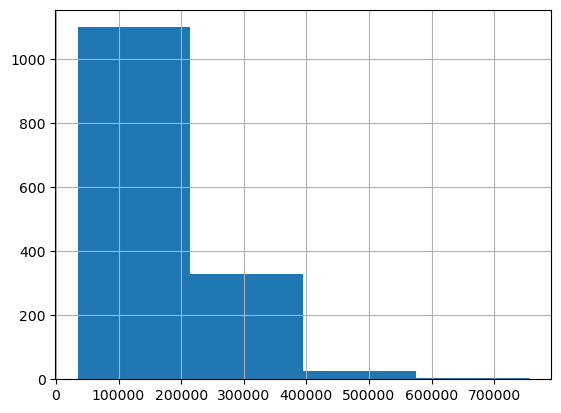

In [38]:
# pd.cut과 비슷한 모양을 보임
train["SalePrice"].hist(bins=4)

<AxesSubplot:xlabel='SalePrice_qcut', ylabel='count'>

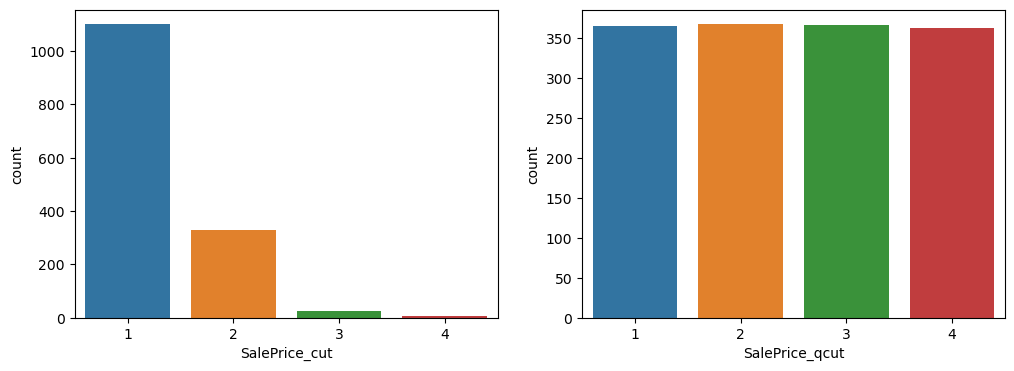

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=train, x="SalePrice_cut", ax=ax[0])
sns.countplot(data=train, x="SalePrice_qcut", ax=ax[1])

# 인코딩

## pandas

In [40]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [41]:
# Ordinal Encoding
train["MSZoning"].astype("category").cat.codes

Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Length: 1460, dtype: int8

In [42]:
# One-Hot-Encoding
pd.get_dummies(train["MSZoning"])

,C (all),FV,RH,RL,RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


## sklearn

In [43]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

oe = OrdinalEncoder()
MSZoning_oe = oe.fit_transform(train[["MSZoning"]])
MSZoning_oe

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [44]:
oe.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)]

In [45]:
enc = OneHotEncoder()
MSZoning_enc = enc.fit_transform(train[["MSZoning"]])
MSZoning_enc

<1460x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [46]:
enc.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)]

In [47]:
pd.DataFrame(MSZoning_enc.toarray(), columns=enc.get_feature_names_out()).head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


# 파생변수

In [48]:
# 수치형 데이터만 불러오기
train.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscVal,MoSold,YrSold,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs,SalePrice_log1p,SalePrice_log1p_ss,SalePrice_ss_log1p
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,2,2008,208500,0.347273,0.241078,0.541506,12.247699,0.560067,0.298083
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,5,2007,181500,0.007288,0.203583,0.220173,12.109016,0.212763,0.007262
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,9,2008,223500,0.536154,0.261908,0.720024,12.317171,0.734046,0.429282
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,2,2006,140000,-0.515281,0.145952,-0.273728,11.849405,-0.437383,-0.724186
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,12,2008,250000,0.869843,0.298709,1.035406,12.429220,1.014651,0.625854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,8,2007,175000,-0.074560,0.194556,0.142815,12.072547,0.121433,-0.077486
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,2,2010,210000,0.366161,0.243161,0.559357,12.254868,0.578019,0.312005
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,2500,5,2010,266500,1.077611,0.321622,1.231776,12.493133,1.174709,0.731219


<AxesSubplot:>

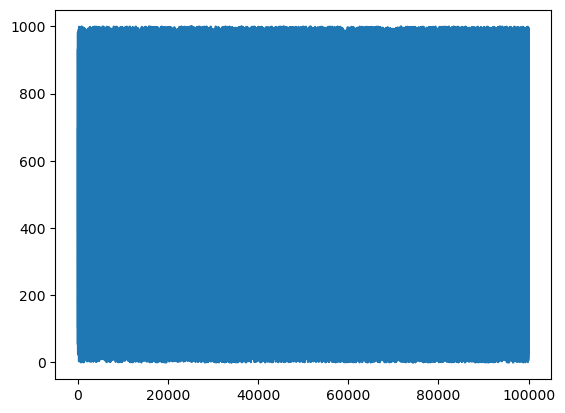

In [49]:
a_uniform = pd.Series(np.random.uniform(0, 1000, 100000))
a_uniform.plot()

<AxesSubplot:>

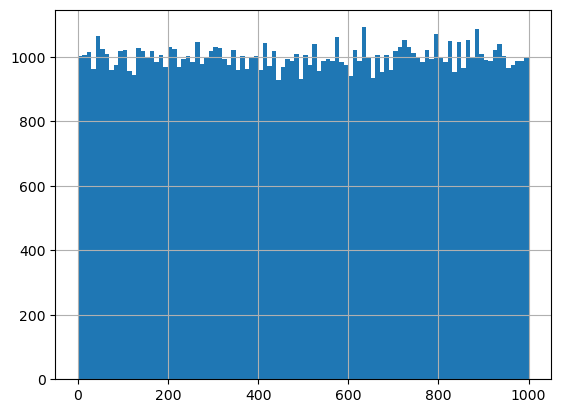

In [50]:
a_uniform.hist(bins=100)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [52]:
house_poly = poly.fit_transform(train[["MSSubClass", "LotArea"]])
pd.DataFrame(house_poly, columns=poly.get_feature_names_out())

,1,MSSubClass,LotArea,MSSubClass^2,MSSubClass LotArea,LotArea^2
0,1.0,60.0,8450.0,3600.0,507000.0,71402500.0
1,1.0,20.0,9600.0,400.0,192000.0,92160000.0
2,1.0,60.0,11250.0,3600.0,675000.0,126562500.0
3,1.0,70.0,9550.0,4900.0,668500.0,91202500.0
4,1.0,60.0,14260.0,3600.0,855600.0,203347600.0
...,...,...,...,...,...,...
1455,1.0,60.0,7917.0,3600.0,475020.0,62678889.0
1456,1.0,20.0,13175.0,400.0,263500.0,173580625.0
1457,1.0,70.0,9042.0,4900.0,632940.0,81757764.0
1458,1.0,20.0,9717.0,400.0,194340.0,94420089.0


# 특성 선택

## 분산 기반 필터링

In [57]:
train.select_dtypes(include="O").columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [61]:
# 범주형 변수 중 어느 값에 치중되어 있는지 확인
# value_counts(1) == value_counts(normalize=True)
for col in train.select_dtypes(include="O").columns:
    print(train[col].value_counts(1) * 100)
    print("-" * 30)

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
------------------------------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
------------------------------
Grvl    54.945055
Pave    45.054945
Name: Alley, dtype: float64
------------------------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
------------------------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
------------------------------
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
------------------------------
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
------------------------------
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
-------------------------

In [67]:
for col in train.select_dtypes(include="O").columns:
    print(train[col].value_counts(1))
    print()
    print(train[col].value_counts(1)[0])
    print("-" * 30)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

0.7883561643835616
------------------------------
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

0.9958904109589041
------------------------------
Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64

0.5494505494505495
------------------------------
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

0.6335616438356164
------------------------------
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

0.897945205479452
------------------------------
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

0.9993150684931507
------------------------------
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

0.7205479452054795
--------------------------

In [68]:
# 90 이상인 col 출력
for col in train.select_dtypes(include="O").columns:
    col_count = train[col].value_counts(1) * 100
    if col_count[0] > 90:
        print(col)

Street
Utilities
LandSlope
Condition2
RoofMatl
BsmtCond
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive
MiscFeature


<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

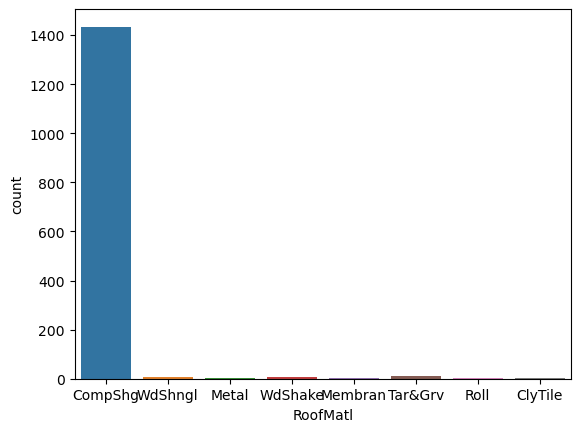

In [71]:
sns.countplot(data=train, x="RoofMatl")

## 상관관계 필터링

In [74]:
# 상관 계수
corr = train.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MiscVal,MoSold,YrSold,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs,SalePrice_log1p,SalePrice_log1p_ss,SalePrice_ss_log1p
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.007683,-0.013585,-0.021407,-0.084284,-0.084284,-0.084284,-0.084284,-0.073959,-0.073959,-0.029286
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.003368,0.011200,0.007450,0.351799,0.351799,0.351799,0.351799,0.355879,0.355879,0.290977
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.038068,0.001205,-0.014261,0.263843,0.263843,0.263843,0.263843,0.257320,0.257320,0.213117
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,-0.031406,0.070815,-0.027347,0.790982,0.790982,0.790982,0.790982,0.817185,0.817185,0.736647
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,0.068777,-0.003511,0.043950,-0.077856,-0.077856,-0.077856,-0.077856,-0.036868,-0.036868,-0.161575
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,-0.034383,0.012398,-0.013618,0.522897,0.522897,0.522897,0.522897,0.586570,0.586570,0.566532
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,-0.010286,0.021490,0.035743,0.507101,0.507101,0.507101,0.507101,0.565608,0.565608,0.531381
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,-0.029815,-0.005965,-0.008201,0.477493,0.477493,0.477493,0.477493,0.430809,0.430809,0.377197
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.003571,-0.015727,0.014359,0.386420,0.386420,0.386420,0.386420,0.372023,0.372023,0.293146
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.004940,-0.015211,0.031706,-0.011378,-0.011378,-0.011378,-0.011378,0.004832,0.004832,-0.001073


In [78]:
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

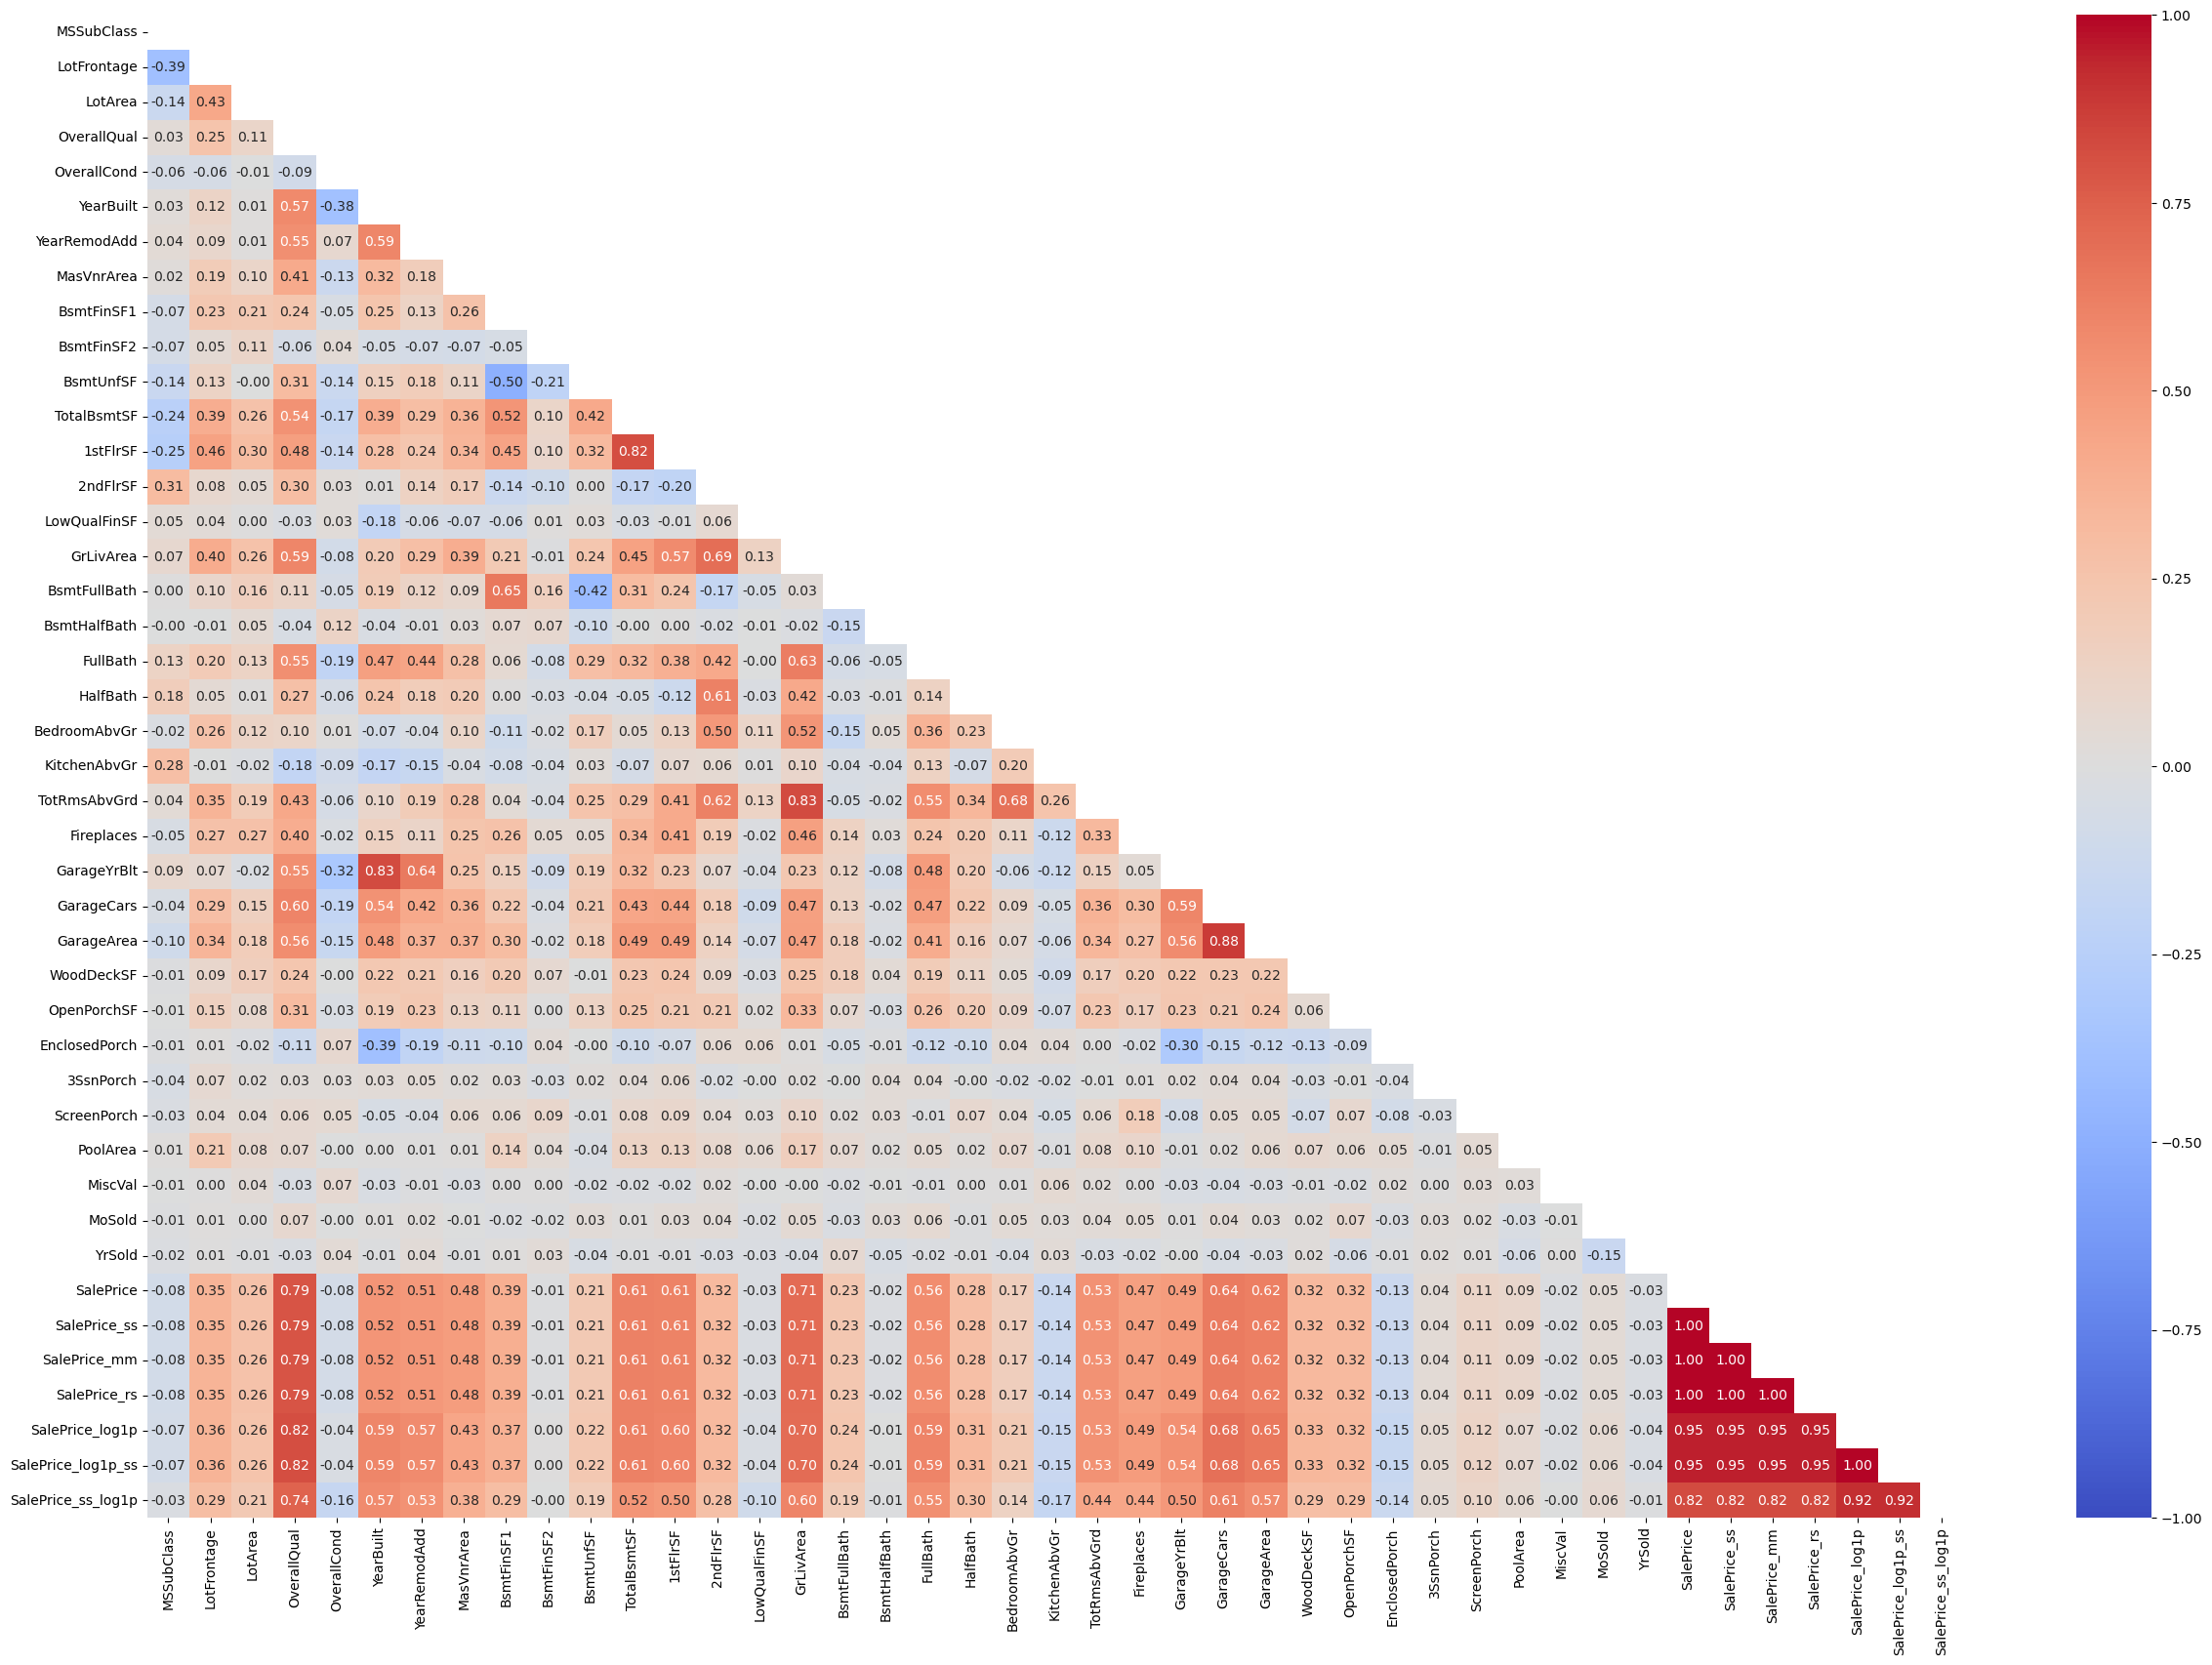

In [85]:
# 히트맵 시각화
plt.figure(figsize=(30, 20))
sns.heatmap(data=corr, cmap="coolwarm", annot=True, fmt=".2f", mask=mask, vmin=-1)

In [87]:
corr.loc["YearBuilt", "GarageYrBlt"]

0.8256674841743408